---
### Universidad de Costa Rica
#### IE0405 - Modelos Probabilísticos de Señales y Sistemas

Segundo semestre del 2021

---

[comment]: <> (Modificar esta sección con datos personales)

* Estudiante: **Fernanda Villalobos Vargas**
* Carné: **B78363**
* Grupo: **1**

# `L4` - *Laboratorio 4*

> El archivo L4_base.py tiene un código para visualizar la solución del problema 2 de la práctica E13 (disponible en la página del tema 13 - Procesos aleatorios). 

**Nota**: Modifique este código para visualizar la solución del problema 4 de esa misma práctica (encontrar el valor teórico de la media y graficarlo también).

---

---
## L4.1 - Entregas

**1-** Cree un repositorio en su cuenta en GitHub llamado Tema4.

**2-**  Coloque ahí su código llamado L4.py

**3-**  Documente la solución con un archivo llamado L4.md, que puede editar y dar formato ahí mismo en GitHub con Markdown (alternativamente, haga todo en un notebook de Jupyter)

**4-**  Aquí en Mediación Virtual coloque el link al repositorio, del tipo: https://github.com/[usuario]/Tema4


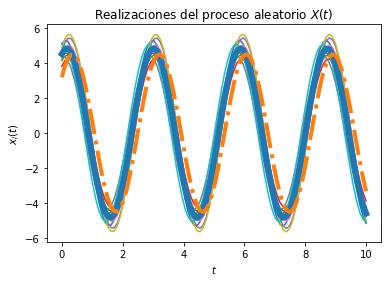

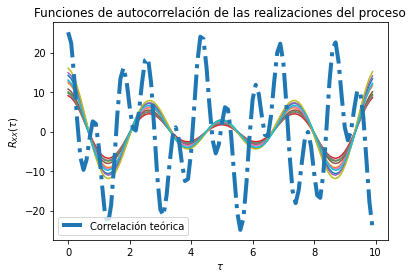

In [7]:
# Base para la solución del Laboratorio 4

# Los parámetros T, t_final y N son elegidos arbitrariamente

import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Variables aleatorias A y Z
vaC = stats.norm(5, np.sqrt(0.2))
vaZ = stats.uniform(0, 2/np.pi)

# Creación del vector de tiempo
T = 100			# número de elementos
t_final = 10	# tiempo en segundos
t = np.linspace(0, t_final, T)
#Para establecer la freceuncia
w = 60

# Inicialización del proceso aleatorio X(t) con N realizaciones
N = 10
X_t = np.empty((N, len(t)))	# N funciones del tiempo x(t) con T puntos

# Creación de las muestras del proceso x(t) (C y Z independientes)
for i in range(N):
	C = vaC.rvs()
	Z = vaZ.rvs()
	x_t = C * np.cos(w*t + Z)
	X_t[i,:] = x_t
	plt.plot(t, x_t)

# Promedio de las N realizaciones en cada instante (cada punto en t)
P = [np.mean(X_t[:,i]) for i in range(len(t))]
plt.plot(t, P, lw=6)

# Graficar el resultado teórico del valor esperado
E = 10/np.pi*(np.cos(w*t)-np.sin(w*t))
plt.plot(t, E, '-.', lw=4)

# Mostrar las realizaciones, y su promedio calculado y teórico
plt.title('Realizaciones del proceso aleatorio $X(t)$')
plt.xlabel('$t$')
plt.ylabel('$x_i(t)$')
plt.show()

# T valores de desplazamiento tau
desplazamiento = np.arange(T)
taus = desplazamiento/t_final

# Inicialización de matriz de valores de correlación para las N funciones
corr = np.empty((N, len(desplazamiento)))

# Nueva figura para la autocorrelación
plt.figure()

# Cálculo de correlación para cada valor de tau
for n in range(N):
	for i, tau in enumerate(desplazamiento):
		corr[n, i] = np.correlate(X_t[n,:], np.roll(X_t[n,:], tau))/T
	plt.plot(taus, corr[n,:])

# Valor teórico de correlación
Rxx = 25.2 * np.cos(w*t + Z) * np.cos(w*(t+taus) + Z)

# Gráficas de correlación para cada realización y la
plt.plot(taus, Rxx, '-.', lw=4, label='Correlación teórica')
plt.title('Funciones de autocorrelación de las realizaciones del proceso')
plt.xlabel(r'$\tau$')
plt.ylabel(r'$R_{XX}(\tau)$')
plt.legend()
plt.show()

---

**Universidad de Costa Rica**

Facultad de Ingeniería

Escuela de Ingeniería Eléctrica

---